# Analisis de componentes principales
 
Se tiene un conjunto de p variables cuantitativas y se quieren construir un numero de variables $r\leq p$ con independencia lineal u ortogonales, que contengan la mayor cantidad de información del conjunto de datos. 

In [ ]:
from pydoc import help 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Datos de delitos en colombia en 2017?

Se tienen los datos de número de delitos en Colombia en el año 2017 por departamento.


In [ ]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Delitos_Colombia.csv"
Datos=pd.read_csv(url, sep=";", decimal=",", index_col=0)
Datos.dtypes

Delitos_Sexuales    int64
Homicidios          int64
Transito            int64
Asalto              int64
Intrafamiliar       int64
Poblacion           int64
dtype: object

## Valores y vectores propios
Sí está interesado en leer más de valores y vectores propios   

1. [Cálculo](http://www.vc.ehu.es/campus/centros/farmacia/deptos-f/depme/apuntes/gracia/Curso_Actual/bolonia/matematicas/capitulo_1/espectral/ValoresVectoresPropiosPapel.pdf)
2. [Alguna de las interpretaciones](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio)
2. [Alguna de las interpretaciones](https://setosa.io/ev/eigenvectors-and-eigenvalues/)

In [ ]:
Datos.columns

Index(['Delitos_Sexuales', 'Homicidios', 'Transito', 'Asalto', 'Intrafamiliar',
       'Poblacion'],
      dtype='object')

## Matrices de Covarianza y correlación

In [ ]:
#Seleccionamos las cuantitativas
cuanti=Datos.select_dtypes(np.number)
covarianza=cuanti.cov()
corre=cuanti.corr()

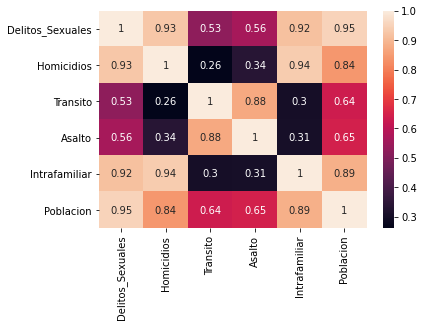

In [ ]:
sns.heatmap(corre, annot = True)
plt.show()

## Escalado de datos

In [ ]:
escala=StandardScaler()
escala.fit(cuanti)
CuantiScale=escala.transform(cuanti)
CuantiScale.shape

(33, 6)

## Construcción de PCA

In [ ]:
#Creamos un objeto PCA y aplicamos
pca=PCA(n_components=3) # Otra opcion pca=PCA(.85)
pca.fit(CuantiScale)
cuanti_pca=pca.transform(CuantiScale) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [ ]:
print("Ajuste de PCA", CuantiScale.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:6]))

Ajuste de PCA (33, 6)
[0.73061492 0.22587703 0.02431541]
suma: 0.980807358569656


In [ ]:
pca.components_

array([[ 0.46593695,  0.4194146 ,  0.31571824,  0.32905421,  0.42327209,
         0.46891387],
       [ 0.13837414,  0.37158066, -0.60945218, -0.58090512,  0.36546543,
         0.01824034],
       [ 0.08745648,  0.34132051, -0.57134851,  0.65173054, -0.28672401,
        -0.20603202]])

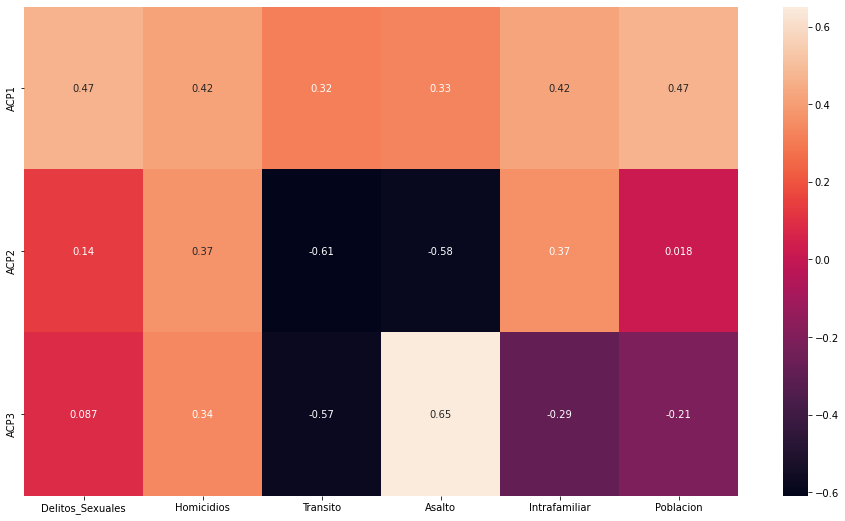

In [ ]:
ACP=[]
for i in range(0, len(pca.components_)):
  x=["ACP", str(i+1)]
  a="".join(x)
  ACP.append(a)
sns.heatmap(pca.components_,xticklabels=cuanti.columns, yticklabels=ACP, annot=True)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.73061492, 0.95649195, 0.98080736])

In [ ]:
print(pca.explained_variance_ratio_)
a=len(pca.components_)+1
y=range(1,a)
fig=px.line(x=y, y=np.cumsum(pca.explained_variance_ratio_))
fig.show()

[0.73061492 0.22587703 0.02431541]


In [ ]:
print(cuanti_pca)

[[ 5.30332533e+00 -2.22525196e+00 -2.32574285e-01]
 [ 5.05480475e-01  3.99082843e-01 -1.17469716e+00]
 [ 8.00186900e+00  4.68732865e+00  1.48341177e-01]
 [ 2.52385434e-01 -1.50617338e-01  1.62349187e-01]
 [ 4.75082239e-02 -2.34745882e-01  2.13570140e-01]
 [-5.12602573e-01 -1.47590768e-01 -1.01260516e-01]
 [-1.35009611e+00  5.07759668e-01  3.80928312e-02]
 [-4.36269103e-01  4.81937073e-02 -3.14350125e-03]
 [-4.47223681e-01 -3.09601374e-02  1.25674204e-01]
 [-5.22975392e-01  3.64600529e-02 -1.85338075e-01]
 [ 2.19113445e+00 -1.74021209e+00  1.44057299e+00]
 [-1.44436945e+00  4.91798669e-01  1.21480391e-03]
 [-1.34702550e-01 -2.48115135e-01  1.93580633e-01]
 [-1.01821592e+00  4.25565123e-01  7.29540470e-02]
 [-4.09285792e-01  1.07287960e-03  1.47736218e-01]
 [ 1.11075548e-01 -8.84448679e-02  2.27814410e-01]
 [-7.88746107e-02 -6.21836779e-01 -1.76911402e-01]
 [-2.25134547e-01 -1.49443244e-01  5.66109151e-02]
 [-6.50028694e-01 -8.17190956e-02 -6.85157785e-02]
 [-1.88707487e-01 -4.84353802e-

In [ ]:
ACP=[]
for i in range(0, len(pca.components_)):
  x=["PC", str(i+1)]
  a="".join(x)
  ACP.append(a)
  
Pca_Tra=pd.DataFrame(cuanti_pca, index=Datos.index, columns=ACP)
print(Pca_Tra)
Pca_Tra.shape

                         PC1       PC2       PC3
Departamento                                    
Antioquia           5.303325 -2.225252 -0.232574
Atlantico           0.505480  0.399083 -1.174697
Bogota_D.C.         8.001869  4.687329  0.148341
Bolivar             0.252385 -0.150617  0.162349
Boyaca              0.047508 -0.234746  0.213570
Caldas             -0.512603 -0.147591 -0.101261
Caqueta            -1.350096  0.507760  0.038093
Cauca              -0.436269  0.048194 -0.003144
Cesar              -0.447224 -0.030960  0.125674
Cordoba            -0.522975  0.036460 -0.185338
Cundinamarca        2.191134 -1.740212  1.440573
Choco              -1.444369  0.491799  0.001215
Huila              -0.134703 -0.248115  0.193581
La_Guajira         -1.018216  0.425565  0.072954
Magdalena          -0.409286  0.001073  0.147736
Meta                0.111076 -0.088445  0.227814
narigno            -0.078875 -0.621837 -0.176911
Norte_de_Santander -0.225135 -0.149443  0.056611
Quindio            -

(33, 3)

In [ ]:
fig=px.scatter(Pca_Tra, x="PC1", y="PC2", hover_name=Pca_Tra.index, text=Pca_Tra.index)
fig.show()


## Ejercicio
Realizar un ACP con los datos incluidos en el archivo de [Cancer](https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Cancer.csv)


In [ ]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Cancer.csv"

array([[ 0.46593695,  0.4194146 ,  0.31571824,  0.32905421,  0.42327209,
         0.46891387],
       [ 0.13837414,  0.37158066, -0.60945218, -0.58090512,  0.36546543,
         0.01824034],
       [ 0.08745648,  0.34132051, -0.57134851,  0.65173054, -0.28672401,
        -0.20603202]])

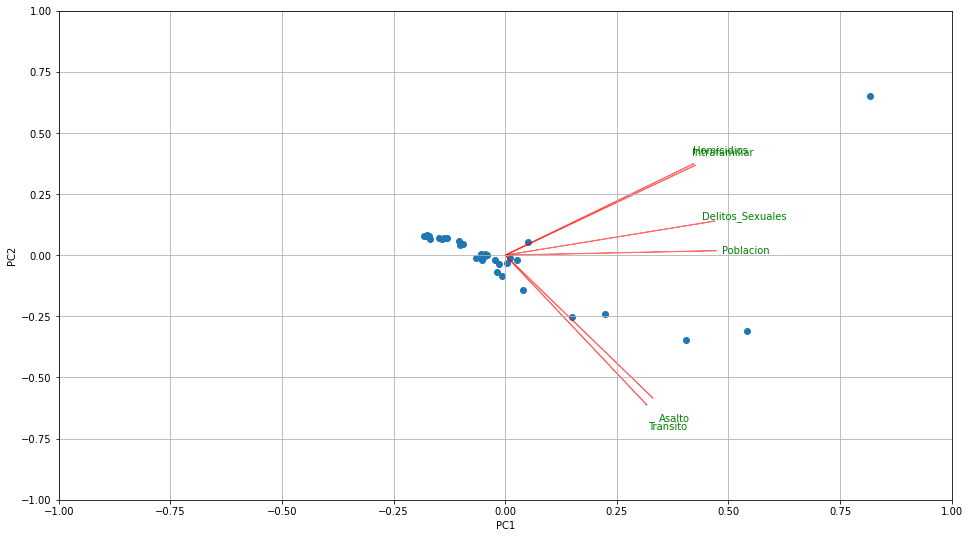

In [ ]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=coeff.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[pca1,i], coeff[pca2,i],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[pca1,i]* 1.15, coeff[pca2,i] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[pca1,i]* 1.15, coeff[pca2,i] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

biplot(cuanti_pca,pca.components_,1,2,labels=Datos.columns)

In [ ]:
import rpy2
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning:

pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning:

pandas >= 1.0 is not supported.



'data.frame':	33 obs. of  7 variables:
 $ Departamento    : Factor w/ 33 levels "Amazonas","Antioquia",..: 2 4 5 6 7 8 9 11 12 14 ...
 $ Delitos_Sexuales: int  2163 1042 4211 944 517 443 221 420 561 530 ...
 $ Homicidios      : int  375 85 1463 28 95 65 18 62 44 14 ...
 $ Transito        : int  5079 1928 725 922 1167 1248 121 861 842 881 ...
 $ Asalto          : int  11897 59 2725 3812 4084 2243 654 2378 2757 1716 ...
 $ Intrafamiliar   : int  8205 3659 19811 2085 2707 975 449 1475 1402 647 ...
 $ Poblacion       : int  6690977 2546138 8181047 2171558 1281979 993870 496262 1416145 1065637 1788648 ...


R[write to console]: Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



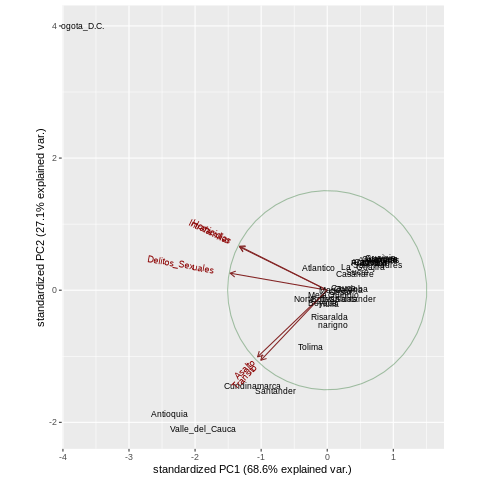

In [ ]:
%%R
datos=read.csv(url("https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Delitos_Colombia.csv"),
               sep=";", dec=",")
str(datos)
acpDatos=prcomp(datos[,c(2:6)], center = TRUE,scale. = TRUE)
library(devtools)
library(ggplot2)
install_github("vqv/ggbiplot")
##### Si no funciona, copiar en la URL https://api.github.com/repos/vqv/ggbiplot/tarball/master
#### Y ejecutar ese archivo.

library(ggbiplot)
ggbiplot(acpDatos,ellipse=TRUE,circle=TRUE,
        labels = datos$Departamento )
                 



## Ejemplo en R

# Base de datos ICFES


In [ ]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber1.csv"
datos1=pd.read_csv(url, sep=";", encoding="latin1")
for i in range(11):
 j=i+2
 x=["https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber",j, ".csv"]
 x[1]=str(x[1])
 url="".join(x)
 print(url)
 datosd=pd.read_csv(url, sep=";", encoding="latin1")
 datos1=pd.concat([datos1, datosd])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9,57,69) have mixed types.Specify dtype option on import or set low_memory=False.



https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber2.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9,17,57,69) have mixed types.Specify dtype option on import or set low_memory=False.



https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber3.csv
https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber4.csv
https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber5.csv
https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber6.csv
https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber7.csv
https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber8.csv
https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber9.csv
https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber10.csv
https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber11.csv
https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber12.csv


In [ ]:
datos1=datos1.dropna()
cuanti=datos1.select_dtypes(np.number)
cuanti.columns

Index(['MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITATIVO_PNAL',
       'MOD_RAZONA_CUANTITATIVO_PGREF', 'MOD_LECTURA_CRITICA_PUNT',
       'MOD_LECTURA_CRITICA_PNAL', 'MOD_LECTURA_CRITICA_PGREF',
       'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_PNAL',
       'MOD_COMPETEN_CIUDADA_PGREF', 'MOD_INGLES_PUNT', 'MOD_INGLES_PGREF',
       'MOD_COMUNI_ESCRITA_PUNT', 'MOD_COMUNI_ESCRITA_DESEM',
       'MOD_COMUNI_ESCRITA_PNAL', 'MOD_COMUNI_ESCRITA_PGREF', 'PUNT_GLOBAL',
       'PERCENTIL_GLOBAL', 'ESTU_INSE_INDIVIDUAL'],
      dtype='object')

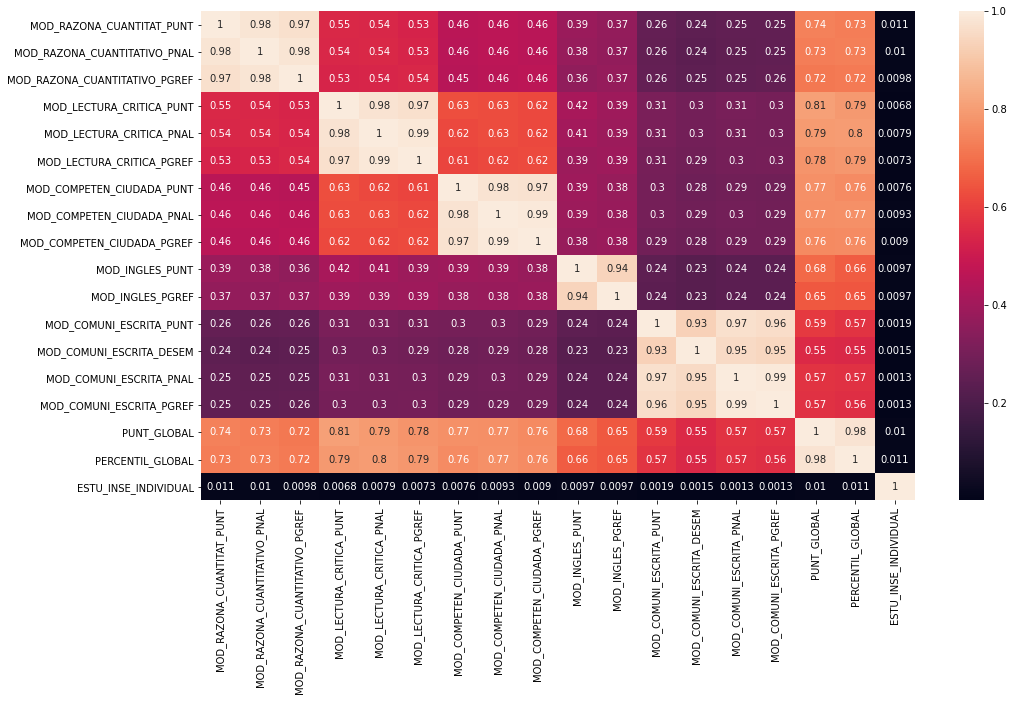

In [ ]:
sns.heatmap(cuanti.corr(), annot = True)
plt.show()

In [ ]:
cuanti.shape

(106738, 18)

In [ ]:
escala=StandardScaler()
escala.fit(cuanti)
CuantiScale=escala.transform(cuanti)
pca=PCA(n_components=4)
pca.fit(CuantiScale)
cuanti_pca=pca.transform(CuantiScale) 
print("Ajuste de PCA", CuantiScale.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:18]))

Ajuste de PCA (106738, 18)
[0.53232121 0.16707493 0.08994937 0.07774472]
suma: 0.86709022996416


In [ ]:
print(pca.explained_variance_ratio_)
a=len(pca.components_)+1
y=range(1,a)
fig=px.line(x=y, y=np.cumsum(pca.explained_variance_ratio_))
fig.show()

[0.53232121 0.16707493 0.08994937 0.07774472]


[-0.23911738 -0.23883763 -0.23747904 -0.26557639 -0.26534381 -0.26290486
 -0.25375527 -0.25546518 -0.25333989 -0.19496345 -0.19186451 -0.19435118
 -0.1878198  -0.1934097  -0.1924517  -0.31942251 -0.31800993 -0.00365196]


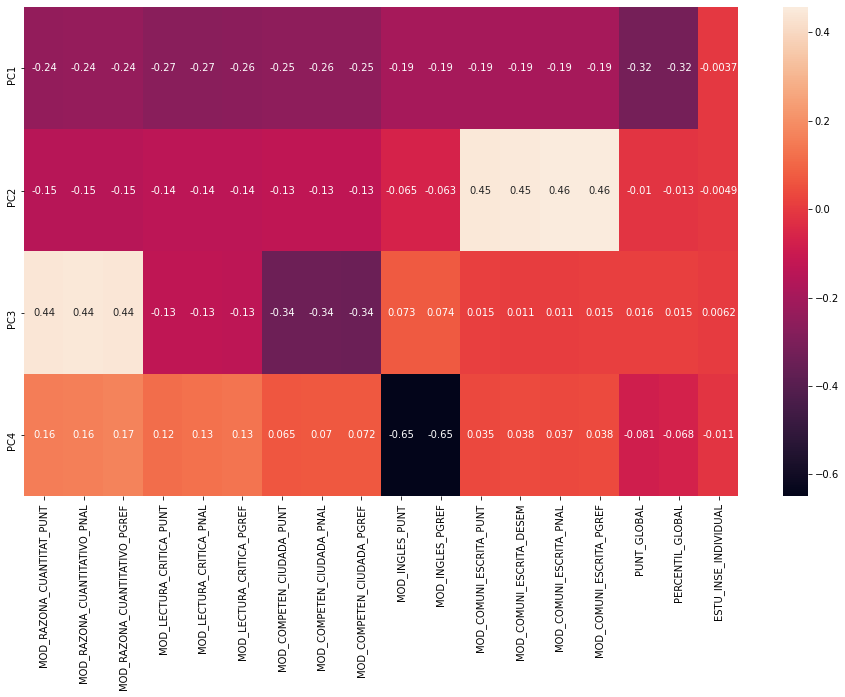

In [ ]:
ACP=[]
for i in range(0, len(pca.components_)):
  x=["PC", str(i+1)]
  a="".join(x)
  ACP.append(a)
sns.heatmap(pca.components_,xticklabels=cuanti.columns, yticklabels=ACP, annot=True)
print(pca.components_[0])

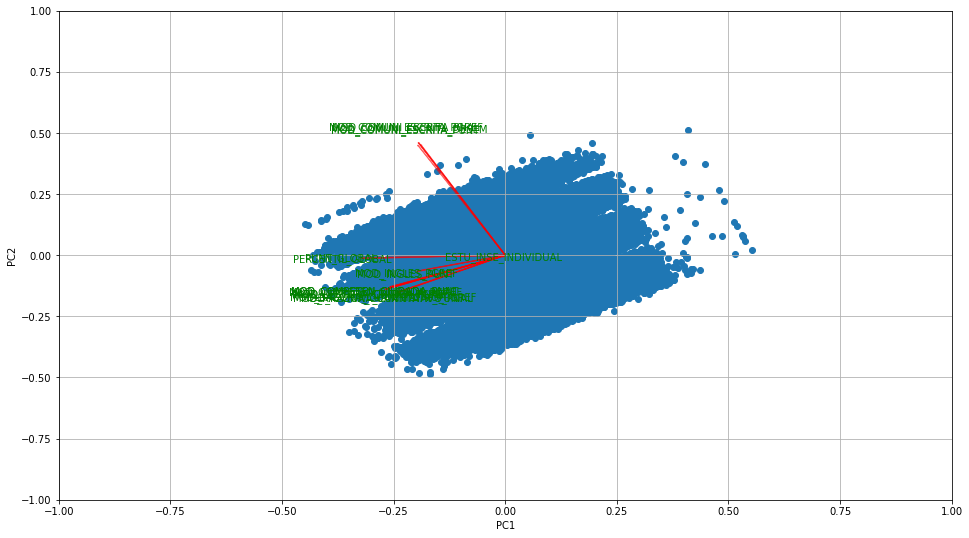

In [ ]:
biplot(cuanti_pca,pca.components_,1,2,labels=cuanti.columns)

In [ ]:
Pca_Tra=pd.DataFrame(cuanti_pca, columns=ACP)
fig=px.scatter(Pca_Tra, x="PC1", y="PC2", color=datos1.FAMI_NIVEL_SISBEN)
fig.show()

In [ ]:
from sklearn.manifold import TSNE
Xcuanti=TSNE(n_components=2).fit_transform(cuanti)
Xcuanti

array([[ -904.8611  ,   -82.34559 ],
       [ -297.3752  ,   540.07434 ],
       [ -839.4218  ,   182.36983 ],
       [ -433.25284 ,  -244.19481 ],
       [  -64.44451 ,  -514.8691  ],
       [  -43.716484,   -20.202656],
       [  184.82947 ,   557.3721  ],
       [ -409.89322 ,   230.6815  ],
       [ -256.30844 ,  -395.93652 ],
       [-1015.1252  ,  -331.01486 ],
       [ -209.17691 ,    98.427574],
       [  -54.25928 ,  -253.66188 ],
       [  -38.805614,   208.03444 ],
       [  119.064354,    97.67649 ],
       [  148.68864 ,   313.2295  ],
       [  663.2017  ,    13.858593],
       [ -697.8085  ,   -21.820688],
       [  301.25742 ,  -244.3079  ],
       [  262.974   ,   -33.231106],
       [  313.8053  ,   179.12445 ],
       [  117.03082 ,  -361.29892 ],
       [  532.5533  ,   231.13846 ],
       [  -26.77527 ,   457.04657 ],
       [ -671.9634  ,  -355.55386 ],
       [  449.6059  ,   -14.277391],
       [  110.29726 ,  -140.66039 ],
       [  542.93677 ,  -227.58276 ],
 

In [ ]:
tSNE=pd.DataFrame(Xcuanti, columns=["D1", "D2"])
fig=px.scatter(tSNE, x="D1", y="D2")
fig.show()